In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Check unique values in catgrical varables

In [4]:
print('Owner uique:',df['Owner'].unique())
print('Fuel_Type unique:',df['Fuel_Type'].unique())
print('Seller_Type unique:',df['Seller_Type'].unique())
print('Transmission unique:',df['Transmission'].unique())

Owner uique: [0 1 3]
Fuel_Type unique: ['Petrol' 'Diesel' 'CNG']
Seller_Type unique: ['Dealer' 'Individual']
Transmission unique: ['Manual' 'Automatic']


#### Check the missing values

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [9]:
df['Currentyear']=2020

In [10]:
df['Years_past']=df.Currentyear-df.Year

In [11]:
df.drop(['Year','Currentyear'],axis=1,inplace=True)

In [12]:
df_Final=pd.get_dummies(df,drop_first=True)

In [13]:
df_Final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_past,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years_past,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [14]:
import seaborn as sns

In [15]:
df_Final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_past,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


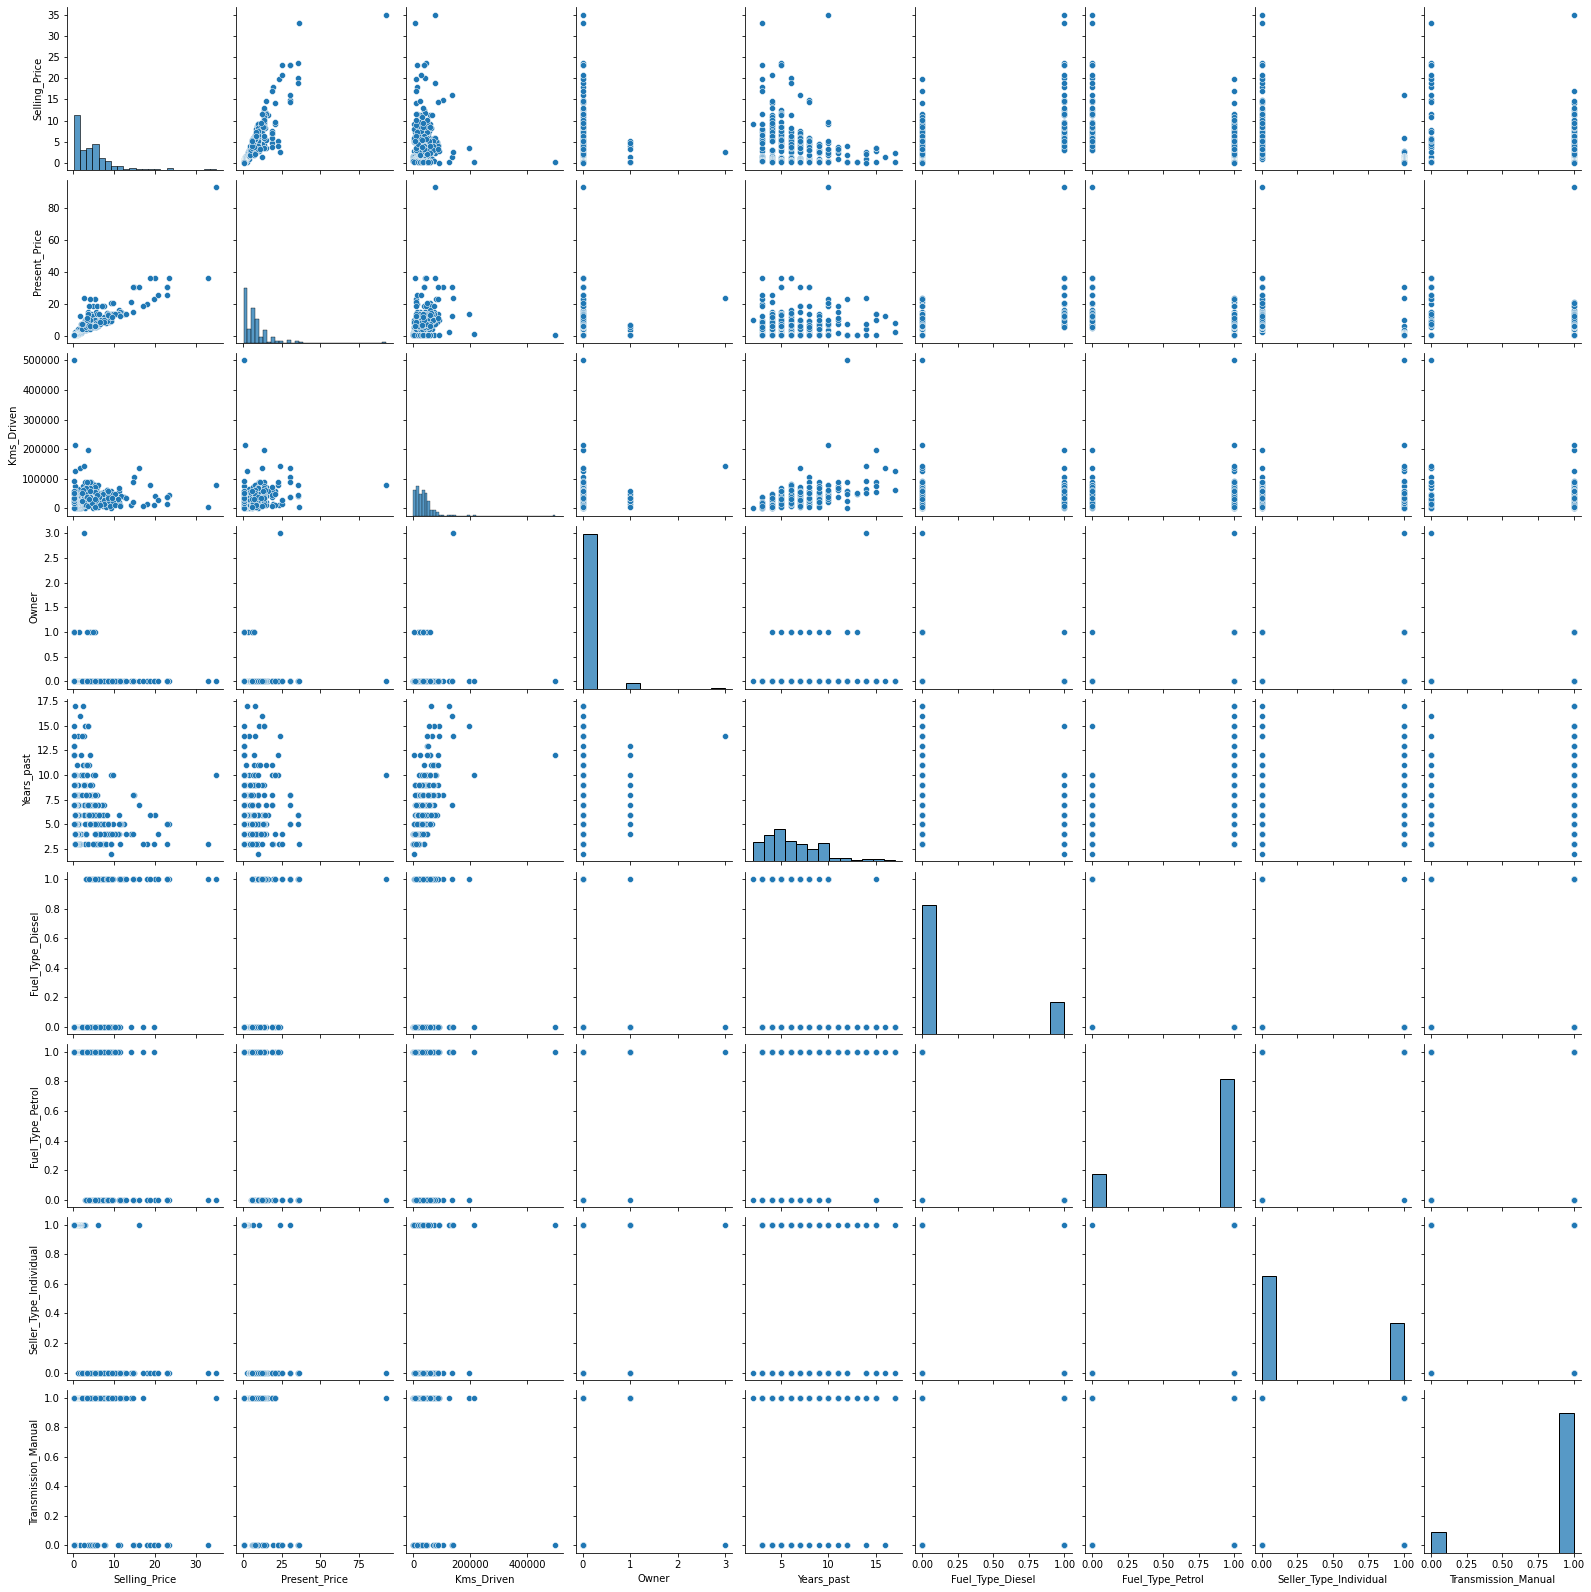

In [16]:
sns.pairplot(df_Final)

In [17]:
import matplotlib.pyplot as plt

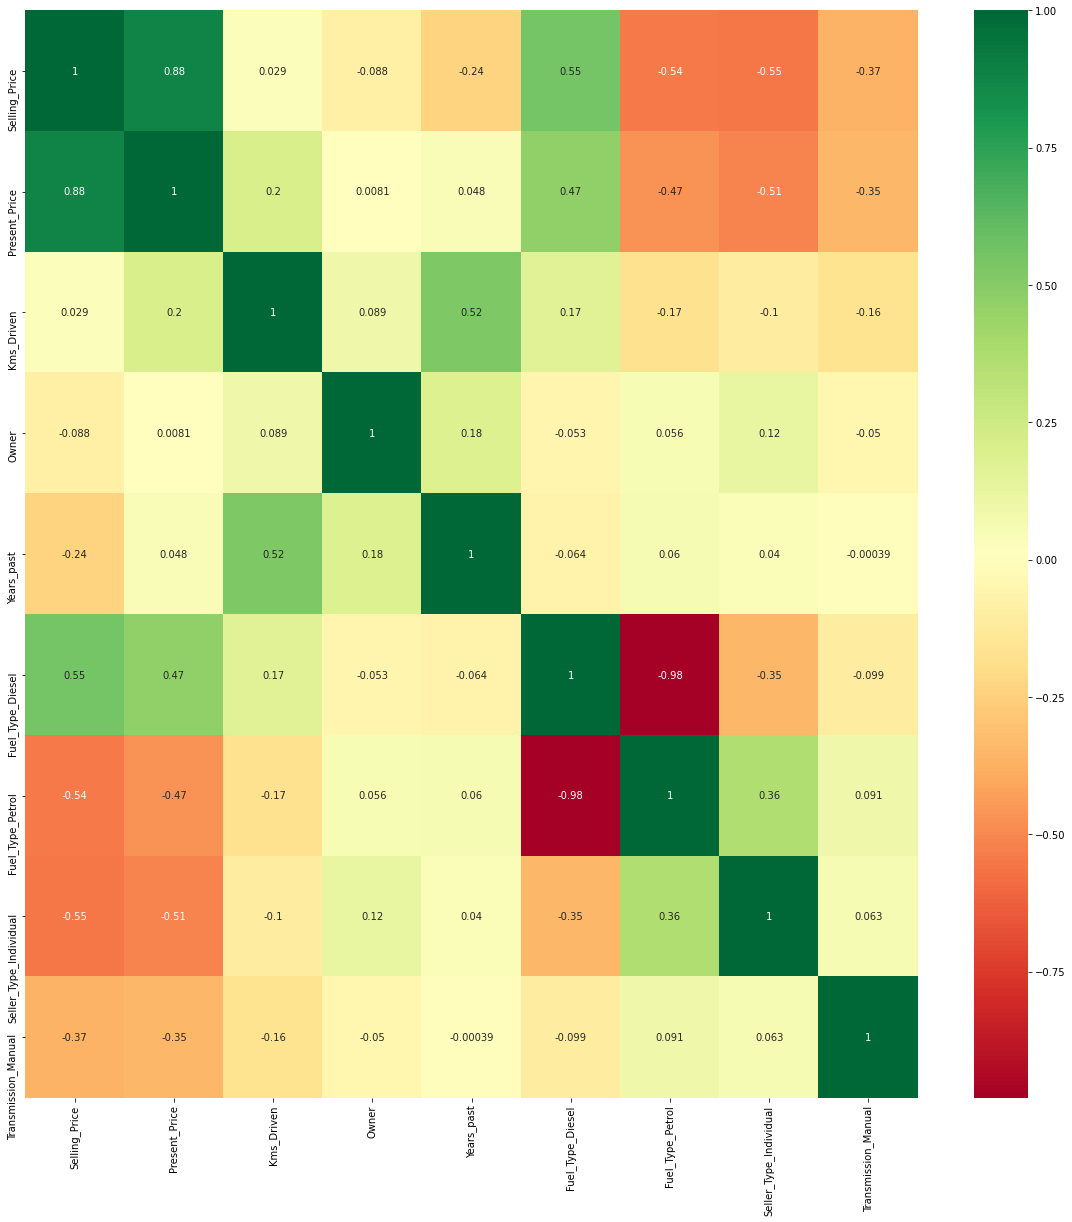

In [18]:
corrmat=df_Final.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

#plt heat map
g=sns.heatmap(df_Final[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [19]:
df_Final.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Years_past',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [20]:
X=df_Final.iloc[:,1:]
Y=df_Final.iloc[:,0]

In [21]:
X.head()

,Present_Price,Kms_Driven,Owner,Years_past,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [22]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [23]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[3.75656277e-01 4.19910046e-02 2.55367966e-04 7.40526449e-02
 2.34600022e-01 1.27008684e-02 1.27299422e-01 1.33444393e-01]


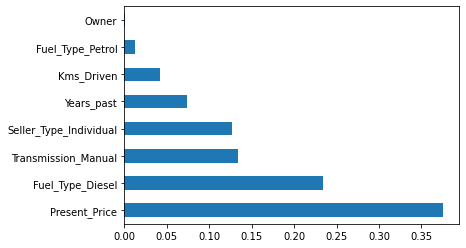

In [26]:
# Plot graph of feature importances for better visualization
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [28]:
print("Xtrain",X_train.shape)
print("ytrain",y_train.shape)
print("Xtest",X_test.shape)
print("ytest",y_test.shape)

Xtrain (240, 8)
ytrain (240,)
Xtest (61, 8)
ytest (61,)


###### n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, 
###### min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
###### min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, 
###### random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [43]:
pip install numpy as np


  Created wheel for np: filename=np-1.0.2-py3-none-any.whl size=13652 sha256=66b2f915afe922755b016723c0ce4e727ec4dad318baf357ce2f86b5e3a1d72a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2a\a4\f6\9c61fc4de0a7ad2232f00c2c87c407b52f61079467924f1c38
Successfully built np


In [47]:
import numpy as np
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [36]:
print('n_estimators:',rf_random.n_estimators)
print('criterion:',rf_random.criterion)
print('max_depth:',rf_random.max_depth)
print('min_samples_split:',rf_random.min_samples_split)
print('min_samples_leaf:',rf_random.min_samples_leaf)
print('max_features:',rf_random.max_features)
print('n_jobs:',rf_random.n_jobs)
print('random_state:',rf_random.random_state)

n_estimators: 100
criterion: mse
max_depth: None
min_samples_split: 2
min_samples_leaf: 1
max_features: auto
n_jobs: None
random_state: None


In [48]:
rf_random={'n_estimators':n_estimators,
          'max_depth':max_depth,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'min_samples_leaf':min_samples_leaf,
          'max_features':max_features}

In [49]:
print(rf_random)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [54]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV

In [56]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_random,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [57]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [59]:
rf_random.best_score_

-4.956390860958409

In [60]:
predictions=rf_random.predict(X_test)

c:\users\user\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

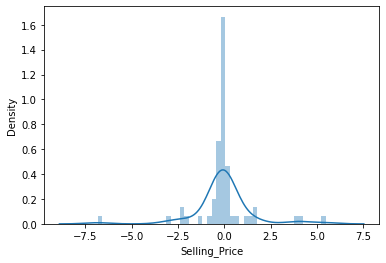

In [61]:
sns.distplot(y_test-predictions)


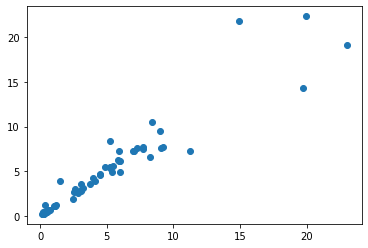

In [64]:
plt.scatter(y_test,predictions)


In [65]:
from sklearn import metrics

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7653523039877785
MSE: 2.4120020612107185
RMSE: 1.55306215626121


In [67]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)